In [51]:
from qiskit import QuantumCircuit, Aer, assemble
import numpy as np
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import pi
import matplotlib.pyplot as plt
plt.style.use('default')

# Set hyperposition to all qubit

In [2]:
qc = QuantumCircuit(3)
# Apply H-gate to each qubit:
for qubit in range(3):
    qc.h(qubit)
# See the circuit:
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     ├───┤
q_2: ┤ H ├
     └───┘

In [3]:
# Let's see the result
svsim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()

# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(final_state) instead.
from qiskit.visualization import array_to_latex
array_to_latex(final_state, prefix="\\text{Statevector} = ")

<IPython.core.display.Latex object>

# Set Qubit idx=0 to hyperposition, Rotate Qubit idx=1 by basis X

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

In [5]:
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()

In [6]:
# In Jupyter Notebooks we can display this nicely using Latex.
# If not using Jupyter Notebooks you may need to remove the 
# array_to_latex function and use print(unitary) instead.
from qiskit.visualization import array_to_latex
array_to_latex(unitary, prefix="\\text{Circuit = }\n")

<IPython.core.display.Latex object>

# Apply rotation around X to Qubit idx=1

In [7]:
qc = QuantumCircuit(2)
qc.x(1)
qc.draw()

q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘

In [8]:
# Simulate the unitary
usim = Aer.get_backend('aer_simulator')
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
# Display the results:
array_to_latex(unitary, prefix="\\text{Circuit = } ")

<IPython.core.display.Latex object>

# CNOT

In [26]:
for q1_flip in [False,True]:
    for q2_flip in [False,True]:
        print(f"{q1_flip} {q2_flip}")

False False
False True
True False
True True


In [33]:
for q1_flip in [False,True]:
    for q2_flip in [False,True]:
        qc = QuantumCircuit(2)
        # Apply CNOT
        if q1_flip:
            qc.x(0)
        if q2_flip:
            qc.x(1)
        qc.cx(0,1)
        # See the circuit:
        qc.measure_all()
        print(qc.draw())
        qobj = assemble(qc)
        print(usim.run(qobj).result().get_counts())

              ░ ┌─┐   
   q_0: ──■───░─┤M├───
        ┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
meas: 2/═════════╩══╩═
                 0  1 
{'00': 1024}
                   ░ ┌─┐   
   q_0: ───────■───░─┤M├───
        ┌───┐┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
{'10': 1024}
        ┌───┐      ░ ┌─┐   
   q_0: ┤ X ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
{'11': 1024}
        ┌───┐      ░ ┌─┐   
   q_0: ┤ X ├──■───░─┤M├───
        ├───┤┌─┴─┐ ░ └╥┘┌─┐
   q_1: ┤ X ├┤ X ├─░──╫─┤M├
        └───┘└───┘ ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
{'01': 1024}


In [35]:
for q1_flip in [False,True]:
    for q2_flip in [False,True]:
        qc = QuantumCircuit(2)
        # Apply CNOT
        if q1_flip:
            qc.x(0)
        if q2_flip:
            qc.x(1)
        qc.cx(1,0)
        # See the circuit:
        qc.measure_all()
        print(qc.draw())
        qobj = assemble(qc)
        print(usim.run(qobj).result().get_counts())

        ┌───┐ ░ ┌─┐   
   q_0: ┤ X ├─░─┤M├───
        └─┬─┘ ░ └╥┘┌─┐
   q_1: ──■───░──╫─┤M├
              ░  ║ └╥┘
meas: 2/═════════╩══╩═
                 0  1 
{'00': 1024}
             ┌───┐ ░ ┌─┐   
   q_0: ─────┤ X ├─░─┤M├───
        ┌───┐└─┬─┘ ░ └╥┘┌─┐
   q_1: ┤ X ├──■───░──╫─┤M├
        └───┘      ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
{'11': 1024}
        ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ X ├┤ X ├─░─┤M├───
        └───┘└─┬─┘ ░ └╥┘┌─┐
   q_1: ───────■───░──╫─┤M├
                   ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
{'01': 1024}
        ┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ X ├┤ X ├─░─┤M├───
        ├───┤└─┬─┘ ░ └╥┘┌─┐
   q_1: ┤ X ├──■───░──╫─┤M├
        └───┘      ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
{'10': 1024}


In [34]:
qc = QuantumCircuit(2)
# Apply CNOT
qc.x(1)
#qc.cx(0,1)
# See the circuit:
qc.measure_all()
print(qc.draw())
qobj = assemble(qc)
print(usim.run(qobj).result().get_counts())

              ░ ┌─┐   
   q_0: ──────░─┤M├───
        ┌───┐ ░ └╥┘┌─┐
   q_1: ┤ X ├─░──╫─┤M├
        └───┘ ░  ║ └╥┘
meas: 2/═════════╩══╩═
                 0  1 
{'10': 1024}


## CNOT up

In [44]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(0,1)
qc.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [45]:
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

## CNOT down

In [46]:
qc = QuantumCircuit(2)
# Apply H-gate to the first:
qc.h(0)
# Apply a CNOT:
qc.cx(1,0)
qc.draw()

┌───┐┌───┐
q_0: ┤ H ├┤ X ├
     └───┘└─┬─┘
q_1: ───────■──

In [47]:
# Let's get the result:
qc.save_statevector()
qobj = assemble(qc)
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

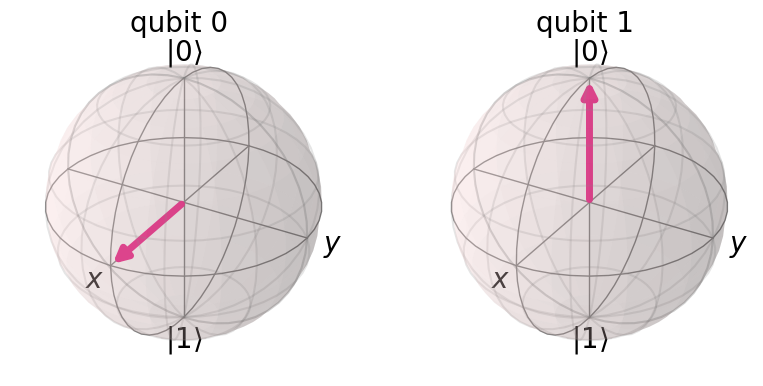

In [48]:
plot_bloch_multivector(final_state)

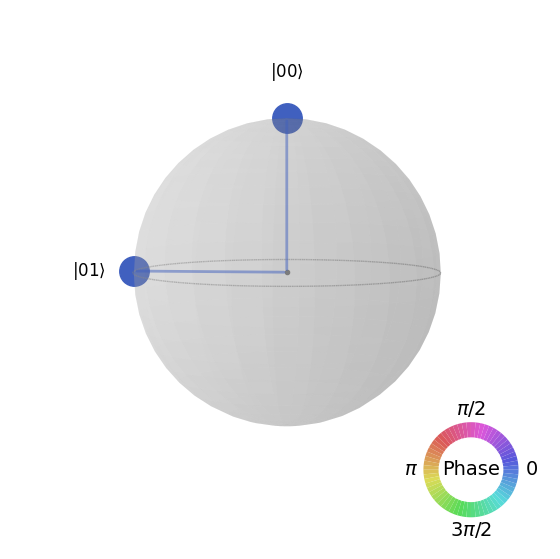

In [49]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(final_state)

# CT Gate

In [52]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

<IPython.core.display.Latex object>

## Test 1

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ X ├
     └───┘

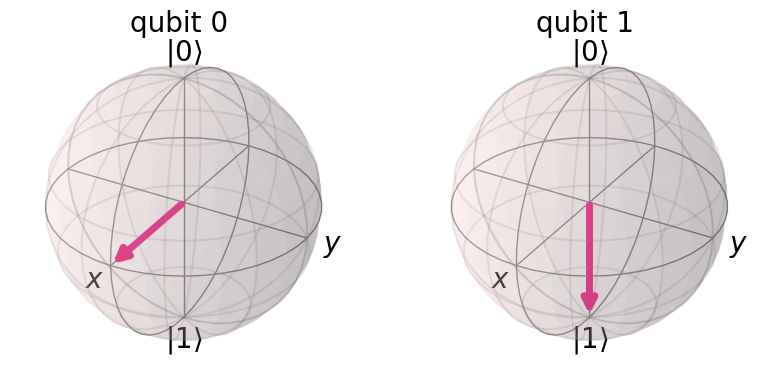

<IPython.core.display.Latex object>

In [60]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(plot_bloch_multivector(final_state))
array_to_latex(final_state, prefix="\\text{Statevector = }")

┌───┐         
q_0: ┤ H ├─■───────
     ├───┤ │P(π/4) 
q_1: ┤ X ├─■───────
     └───┘

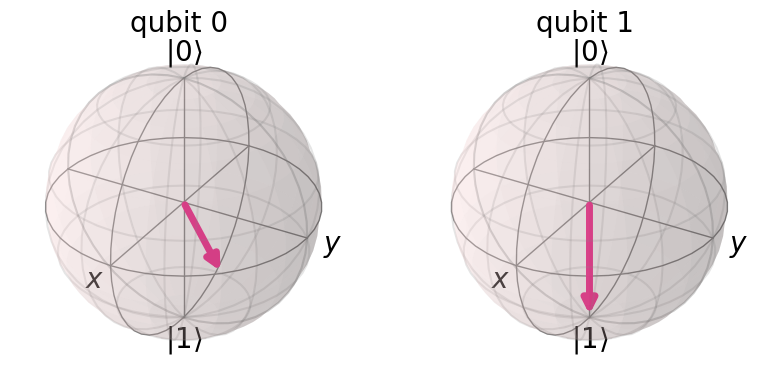

<IPython.core.display.Latex object>

In [61]:
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(plot_bloch_multivector(final_state))
array_to_latex(final_state, prefix="\\text{Statevector = }")

## Test 2

┌───┐          
q_0: ┤ H ├──────────
     ├───┤┌───┐┌───┐
q_1: ┤ H ├┤ T ├┤ T ├
     └───┘└───┘└───┘

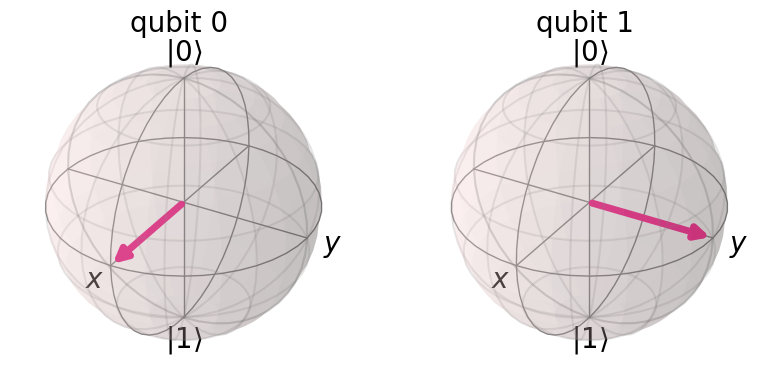

<IPython.core.display.Latex object>

In [69]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.t(1)
qc.t(1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(plot_bloch_multivector(final_state))
array_to_latex(final_state, prefix="\\text{Statevector = }")

┌───┐                   
q_0: ┤ H ├───────────■───────
     ├───┤┌───┐┌───┐ │P(π/4) 
q_1: ┤ H ├┤ T ├┤ T ├─■───────
     └───┘└───┘└───┘

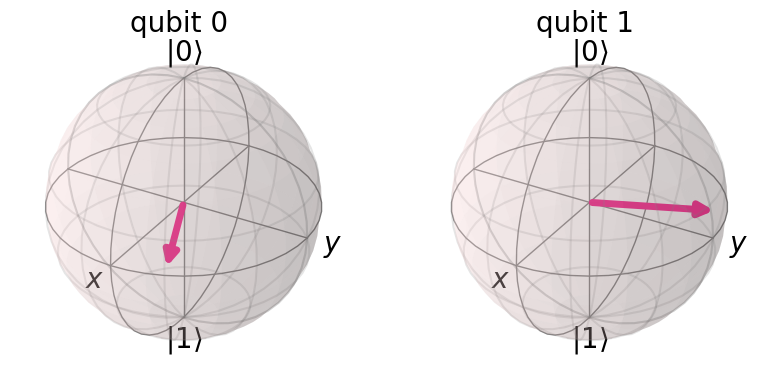

<IPython.core.display.Latex object>

In [70]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.t(1)
qc.t(1)
# Add Controlled-T
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_statevector()
qobj = assemble(qc)
final_state = svsim.run(qobj).result().get_statevector()
display(plot_bloch_multivector(final_state))
array_to_latex(final_state, prefix="\\text{Statevector = }")